In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

import esmlab
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,4]
mpl.rcParams['figure.dpi'] = 350
mpl.rcParams['savefig.dpi'] = 350

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0

In [2]:
def global_mean_2D(var, weights):
    # assumes 2D field as var input

    # make sure masking is correct, otherwise we get nans
    var = np.ma.masked_invalid(var)
    
    # resulting variable should have dimensions of depth and time (x)
    ave = np.zeros(var.shape[0])

    # loop over time
    for t in np.arange(var.shape[0]):
        ave[t] = np.ma.average(var[t,:,:], weights = weights)
    return ave

# function to take global weighted mean, keeping depth information
def global_mean_3D(var, weights):
    # make sure masking is correct, otherwise we get nans
    var = np.ma.masked_invalid(var)
    
    # resulting variable should have dimensions of depth and time (x)
    ave = np.zeros([var.shape[0], var.shape[1]])

    # loop over time
    for t in np.arange(var.shape[0]):
    # loop over each depth slice
        for d in np.arange(var.shape[1]):
            ave[t,d] = np.ma.average(var[t,d,:,:], weights = weights)
    return ave

#make annual means from monthly timeseries, starting in June

#assumes data starts in january

def annual_mean_june(var,nyears):
    var_annual = np.zeros((nyears))
    for y in range(0,nyears):
        var_annual[y] = var[(y*12+6):(y*12+18)].mean()
        
    return var_annual

In [4]:
path = '/glade/work/jcoupe/FSDS_NW/'

mask = xr.open_dataset('/glade/u/home/vgarza/gridarea.nc')

fsds_5 = xr.open_dataset(path+'nw_targets_01.atm.h0.FSDS.nc')
fsds_27 = xr.open_dataset(path+'nw_targets_02.atm.h0.FSDS.nc')
fsds_37 = xr.open_dataset(path+'nw_targets_03.atm.h0.FSDS.nc')
fsds_16 = xr.open_dataset(path+'nw_targets_04.atm.h0.FSDS.nc')
fsds_47 = xr.open_dataset(path+'nw_targets_05.atm.h0.FSDS.nc')
fsds_150 = xr.open_dataset(path+'nw_ur_150_07.atm.h0.FSDS.nc')


cntrl_1 = xr.open_dataset(path+'nw_cntrl_03.atm.h0.FSDS.nc') # 25.5 years = 306
cntrl_2 = xr.open_dataset(path+'nw_cntrl_03m02.atm.h0.FSDS.nc') # 20 years = 240 mo
cntrl_3 = xr.open_dataset(path+'nw_cntrl_03m03.atm.h0.FSDS.nc') # 19 years = 228

In [5]:
path = '/glade/u/home/chsharri/Work/NW/'

maskTemp = xr.open_dataset('/glade/u/home/chsharri/Work/NW/region_mask_nw.nc')

temp_5 = xr.open_dataset(path+'nw_targets_01.pop.h.TEMP.nc')
temp_27 = xr.open_dataset(path+'nw_targets_02.pop.h.TEMP.nc')
temp_37 = xr.open_dataset(path+'nw_targets_03.pop.h.TEMP.nc')
temp_16 = xr.open_dataset(path+'nw_targets_04.pop.h.TEMP.nc')
temp_47 = xr.open_dataset(path+'nw_targets_05.pop.h.TEMP.nc')
temp_150 = xr.open_dataset(path+'nw_ur_150_07.pop.h.TEMP.nc')

#CONTROLS
temp_cntrl_1 = xr.open_dataset(path+'nw_cntrl_03.pop.h.TEMP.nc') # 25.5 years = 306
temp_cntrl_2 = xr.open_dataset(path+'nw_cntrl_03m02.pop.h.TEMP.nc') # 20 years = 240 mo
temp_cntrl_3 = xr.open_dataset(path+'nw_cntrl_03m03.pop.h.TEMP.nc') # 19 years = 228

In [6]:
t_cntrl_1_global_mo = global_mean_2D(temp_cntrl_1.TEMP[(42-12):234,0,:,:], maskTemp.TAREA)
t_cntrl_2_global_mo = global_mean_2D(temp_cntrl_2.TEMP[(42-12):234,0,:,:], maskTemp.TAREA)
t_cntrl_3_global_mo = global_mean_2D(temp_cntrl_3.TEMP[(42-12):234,0,:,:], maskTemp.TAREA)
full_temp_control = (t_cntrl_1_global_mo + t_cntrl_2_global_mo + t_cntrl_2_global_mo)/3

t_5_global_mo = global_mean_2D(temp_5.TEMP[:,0,:,:], maskTemp.TAREA)
t_27_global_mo = global_mean_2D(temp_27.TEMP[:,0,:,:], maskTemp.TAREA)
t_37_global_mo = global_mean_2D(temp_37.TEMP[:,0,:,:], maskTemp.TAREA)
t_16_global_mo = global_mean_2D(temp_16.TEMP[:,0,:,:], maskTemp.TAREA)
t_47_global_mo = global_mean_2D(temp_47.TEMP[:,0,:,:], maskTemp.TAREA)
t_150_global_mo = global_mean_2D(temp_150.TEMP[:,0,:,:], maskTemp.TAREA)

In [7]:
t_control_pre = full_temp_control[0:24]

t_5_global  = np.append(t_control_pre, t_5_global_mo)
t_27_global = np.append(t_control_pre, t_27_global_mo)
t_37_global = np.append(t_control_pre, t_37_global_mo)
t_16_global = np.append(t_control_pre, t_16_global_mo)
t_47_global = np.append(t_control_pre, t_47_global_mo)
t_150_global= np.append(t_control_pre, t_150_global_mo)

In [8]:
t_5_global_yr = annual_mean_june(t_5_global_mo, 15)
t_27_global_yr = annual_mean_june(t_27_global_mo, 15)
t_37_global_yr = annual_mean_june(t_37_global_mo, 15)
t_16_global_yr = annual_mean_june(t_16_global_mo, 15)
t_47_global_yr = annual_mean_june(t_47_global_mo, 15)
#sst_150_global_yr = annual_mean_june(sst_150_global_mo, 15) #truncated version
t_150_global_yr = annual_mean_june(t_150_global_mo, 30) #full version

In [11]:
control_pre_annual = annual_mean_june(t_control_pre,2)
full_control_annual= annual_mean_june(full_temp_control,17)    

In [12]:
t_5_global_yr = np.append(control_pre_annual,  t_5_global_yr)
t_27_global_yr = np.append(control_pre_annual, t_27_global_yr)
t_37_global_yr = np.append(control_pre_annual, t_37_global_yr)
t_16_global_yr = np.append(control_pre_annual, t_16_global_yr)
t_47_global_yr = np.append(control_pre_annual, t_47_global_yr)
t_150_global_yr = np.append(control_pre_annual,t_150_global_yr)

In [13]:
fsds_5 = esmlab.statistics.weighted_mean(fsds_5.FSDS,weights=mask,dim=['nlat', 'nlon']).compute()
fsds_27 = esmlab.statistics.weighted_mean(fsds_27.FSDS,weights=mask,dim=['nlat', 'nlon']).compute()
fsds_37 =esmlab.statistics.weighted_mean(fsds_37.FSDS,weights=mask,dim=['nlat', 'nlon']).compute()
fsds_16 = esmlab.statistics.weighted_mean(fsds_16.FSDS,weights=mask,dim=['nlat', 'nlon']).compute()
fsds_47 = esmlab.statistics.weighted_mean(fsds_47.FSDS,weights=mask,dim=['nlat', 'nlon']).compute()
fsds_150 = esmlab.statistics.weighted_mean(fsds_150.FSDS,weights=mask,dim=['nlat', 'nlon']).compute()

In [14]:
fsds_cntrl_1_global_mo = esmlab.statistics.weighted_mean(cntrl_1.FSDS[(42-12):(42+12),:,:],weights=mask,dim=['nlat', 'nlon']).compute()
fsds_cntrl_2_global_mo = esmlab.statistics.weighted_mean(cntrl_2.FSDS[(42-12):(42+12),:,:],weights=mask,dim=['nlat', 'nlon']).compute()
fsds_cntrl_3_global_mo = esmlab.statistics.weighted_mean(cntrl_3.FSDS[(42-12):(42+12),:,:],weights=mask,dim=['nlat', 'nlon']).compute()


cntrl_1_FULL =esmlab.statistics.weighted_mean(cntrl_1.FSDS[(42-12):228,:,:],weights=mask,dim=['nlat', 'nlon']).compute()
cntrl_2_FULL = esmlab.statistics.weighted_mean(cntrl_2.FSDS[(42-12):228,:,:],weights=mask,dim=['nlat', 'nlon']).compute()
cntrl_3_FULL = esmlab.statistics.weighted_mean(cntrl_3.FSDS[(42-12):228,:,:],weights=mask,dim=['nlat', 'nlon']).compute()

In [15]:
cntrl_mean = (fsds_cntrl_1_global_mo + fsds_cntrl_2_global_mo + fsds_cntrl_3_global_mo)/3

fullFSDS_MEAN = (cntrl_1_FULL + cntrl_2_FULL + cntrl_3_FULL)/3

In [22]:
dates_com = pd.date_range(start = '12/31/2018', end = '12/31/2049', freq='Y')
dates_short = pd.date_range(start = '12/31/2018', end = '12/31/2034', freq='Y')

In [17]:
fsds_5_global_yr = annual_mean_june(fsds_5, 15)
fsds_27_global_yr = annual_mean_june(fsds_27, 15)
fsds_37_global_yr = annual_mean_june(fsds_37, 15)
fsds_16_global_yr = annual_mean_june(fsds_16, 15)
fsds_47_global_yr = annual_mean_june(fsds_47, 15)
fsds_150_global_yr = annual_mean_june(fsds_150, 30)

In [18]:
fsds_cntr_1 = annual_mean_june(cntrl_1_FULL, 2)
fsds_cntr_2 = annual_mean_june(cntrl_2_FULL, 2)
fsds_cntr_3 = annual_mean_june(cntrl_3_FULL, 2)

control_pre = (fsds_cntr_1)#+fsds_cntr_2+fsds_cntr_3)/3

In [19]:
fsds_5_global_yr = np.append(control_pre,  fsds_5_global_yr)
fsds_27_global_yr = np.append(control_pre, fsds_27_global_yr)
fsds_37_global_yr = np.append(control_pre, fsds_37_global_yr)
fsds_16_global_yr = np.append(control_pre, fsds_16_global_yr)
fsds_47_global_yr = np.append(control_pre, fsds_47_global_yr)
fsds_150_global_yr = np.append(control_pre, fsds_150_global_yr)

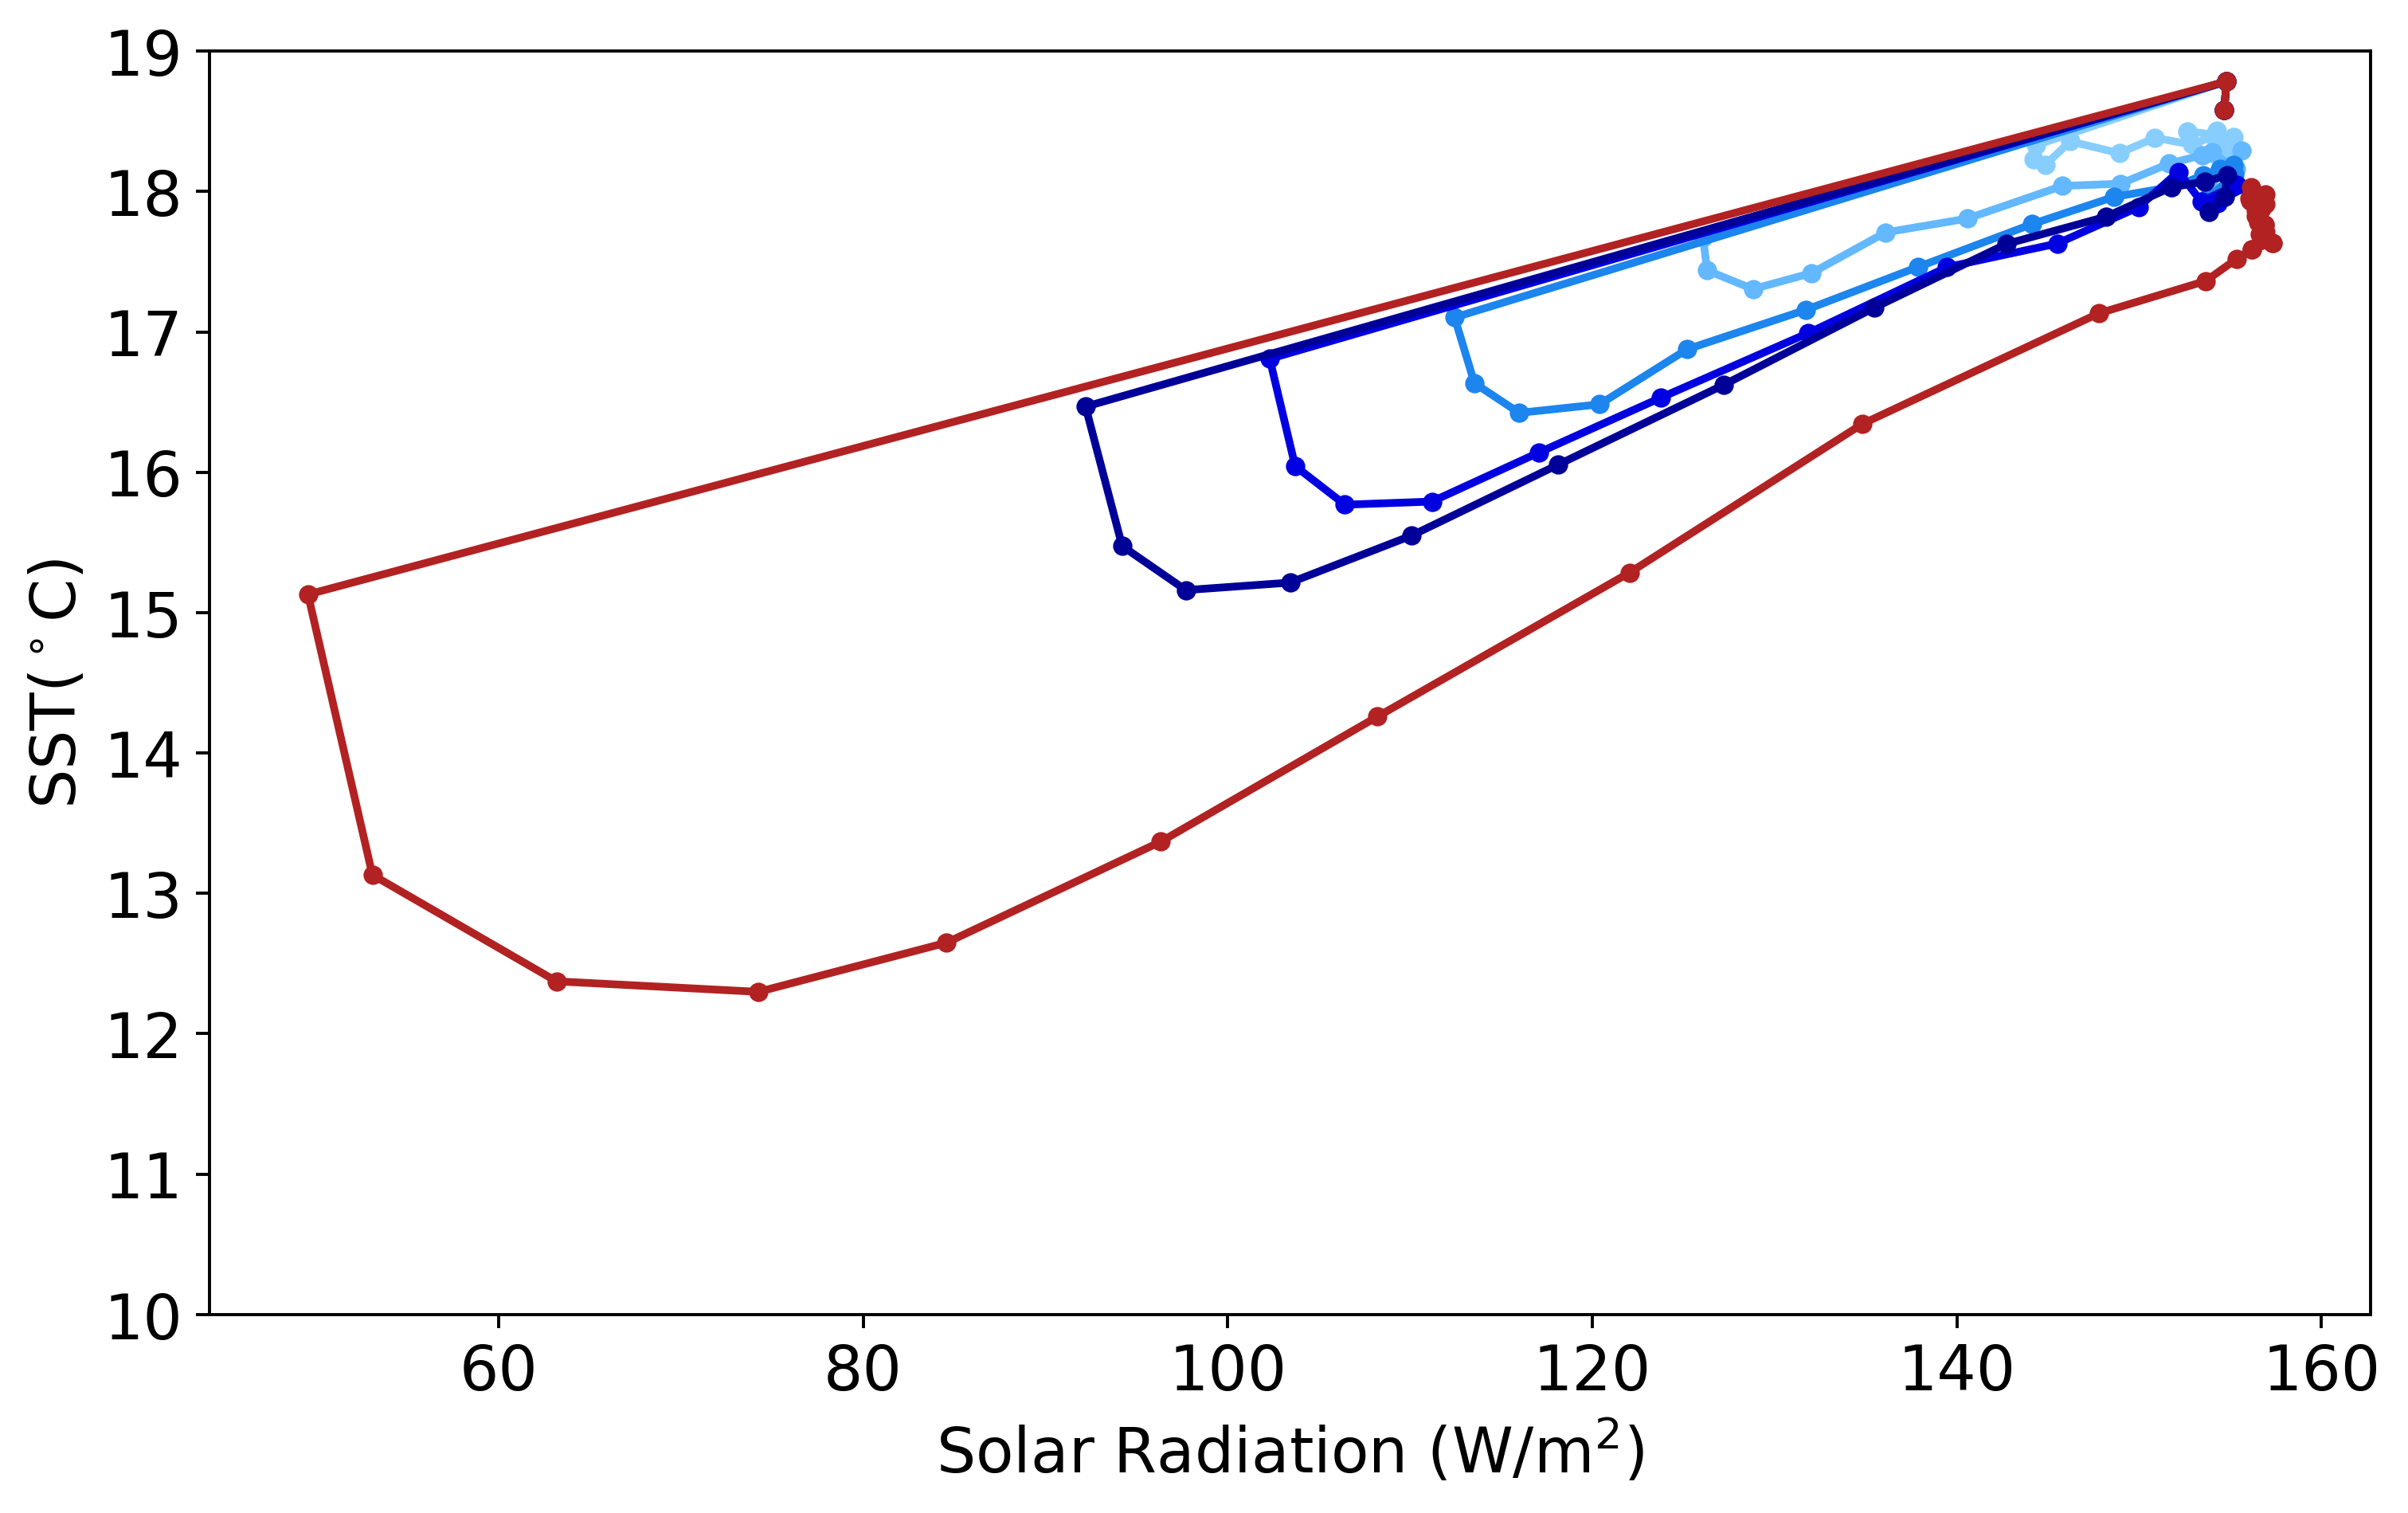

In [20]:
fig= plt.figure(figsize=(10,6), facecolor='w')

plt.plot(1*fsds_5_global_yr,t_5_global_yr,color = '#87ceff',marker ='o',markersize=4, label = '5 Tg')
plt.plot(1*fsds_16_global_yr,t_16_global_yr,color = '#63b8ff',marker ='o',markersize=4, label = '16 Tg')
plt.plot(1*fsds_27_global_yr,t_27_global_yr,color = '#1c85ee',marker ='o',markersize=4, label = '27 Tg')
plt.plot(1*fsds_37_global_yr,t_37_global_yr,color = '#0000e1',marker ='o',markersize=4, label = '37 Tg')
plt.plot(1*fsds_47_global_yr,t_47_global_yr,color = '#000099',marker ='o',markersize=4, label = '47 Tg')
plt.plot(1*fsds_150_global_yr[0:17],t_150_global_yr[0:17],color = '#b22222',marker ='o',markersize=4, label = '150 Tg')
plt.plot(1*fsds_150_global_yr[14:31],t_150_global_yr[14:31],color = '#b22222',marker ='o',markersize=4)

#plt.legend( loc='upper right',fontsize = '12')
plt.ylim(10,19)

plt.xlabel('Solar Radiation (W/m$^2$)')
plt.ylabel('SST($^\circ$C)')
#plt.ylabel('$\Delta$NO3$_{100}$($mmol/m^3$)')
plt.show() 


#fig.savefig('/glade/work/vgarza/nw_figures/hysteresis-SST.jpg' , bbox_inches='tight')

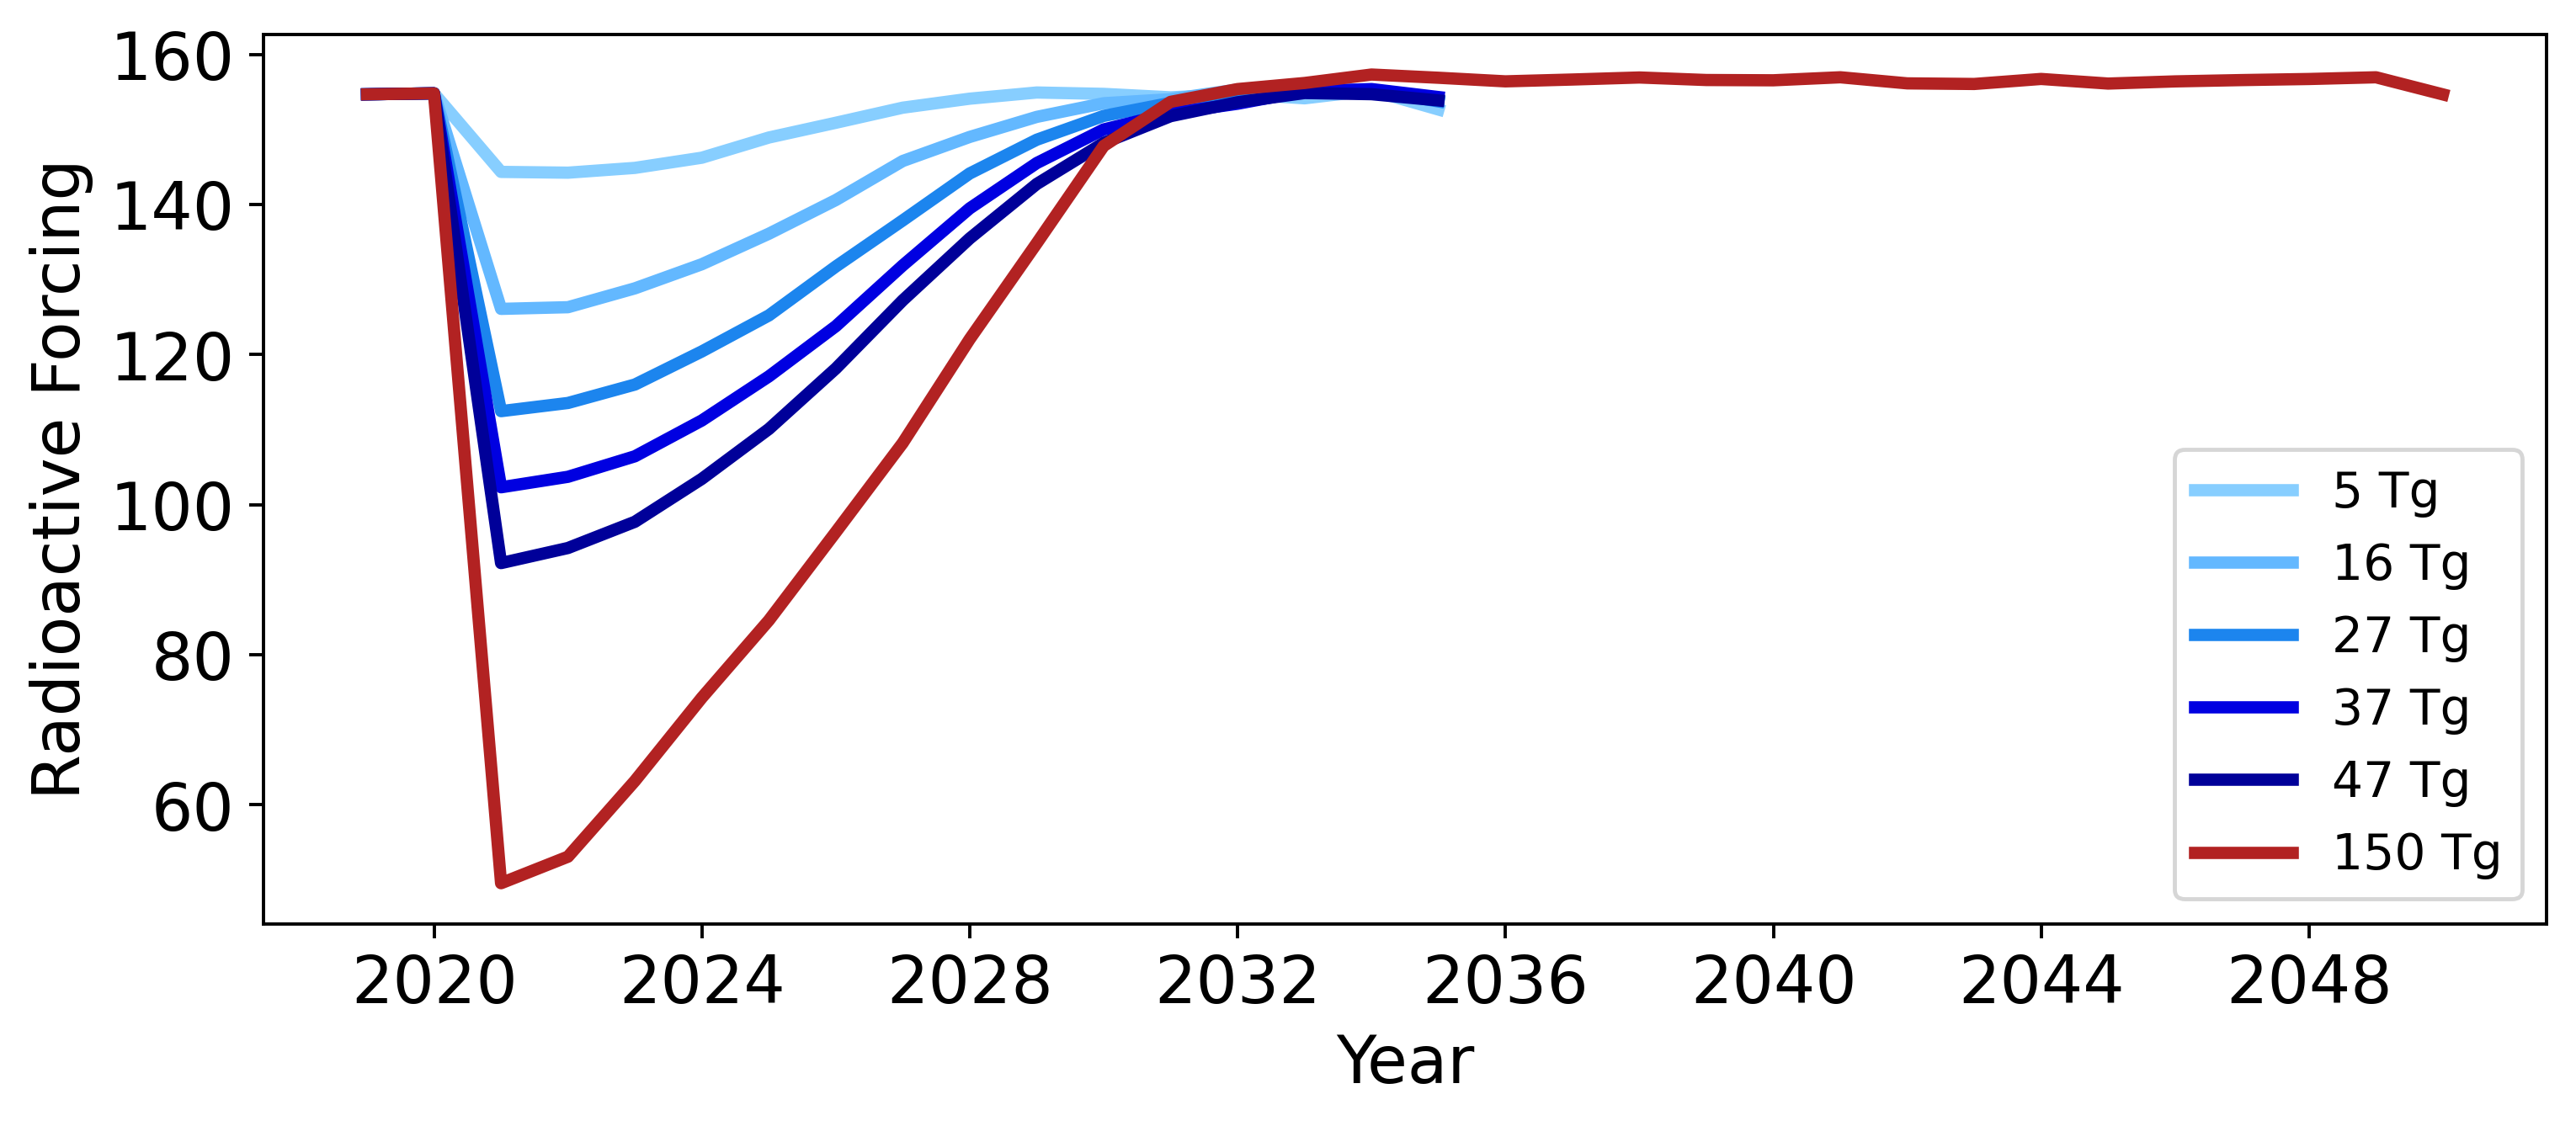

In [23]:
fig= plt.figure(figsize=(10,4), facecolor='w')

#plt.plot(dates_yr,1*(full_control_annual),color = 'k', linewidth = 1, label = 'Control')
plt.plot(dates_short,1*fsds_5_global_yr,color = '#87ceff', linewidth = 3, label = '5 Tg')
plt.plot(dates_short,1*fsds_16_global_yr,color = '#63b8ff', linewidth = 3, label = '16 Tg')
plt.plot(dates_short,1*fsds_27_global_yr,color = '#1c85ee', linewidth = 3, label = '27 Tg')
plt.plot(dates_short,1*fsds_37_global_yr,color = '#0000e1', linewidth = 3, label = '37 Tg')
plt.plot(dates_short,1*fsds_47_global_yr,color = '#000099', linewidth = 3, label = '47 Tg')
plt.plot(dates_com,1*fsds_150_global_yr,color = '#b22222', linewidth = 3, label = '150 Tg')

plt.legend( loc='lower right',fontsize = '12')



plt.xlabel('Year')
plt.ylabel('Radioactive Forcing')

plt.show() 

In [24]:
full_cntrl_1 = annual_mean_june(cntrl_1_FULL,19)
full_cntrl_2 = annual_mean_june(cntrl_2_FULL,19)
full_cntrl_3 = annual_mean_june(cntrl_3_FULL,19)
full_control_pre = (full_cntrl_1 + full_cntrl_2 +full_cntrl_3)/3

In [25]:
dates_yr_full = pd.date_range(start = '12/31/2019', end = '12/31/2036', freq='Y')

In [27]:
fsds_cntr_1 = annual_mean_june(fsds_cntrl_1_global_mo, 1)
fsds_cntr_2 = annual_mean_june(fsds_cntrl_2_global_mo, 1)
fsds_cntr_3 = annual_mean_june(fsds_cntrl_3_global_mo, 1)

control_pre = (fsds_cntr_1+fsds_cntr_2+fsds_cntr_3)/3

In [28]:
fsds_5_global_yr = np.append(control_pre, fsds_5_global_yr)
fsds_27_global_yr = np.append(control_pre, fsds_27_global_yr)
fsds_37_global_yr = np.append(control_pre, fsds_37_global_yr)
fsds_16_global_yr = np.append(control_pre, fsds_16_global_yr)
fsds_47_global_yr = np.append(control_pre, fsds_47_global_yr)
fsds_150_global_yr = np.append(control_pre, fsds_150_global_yr)

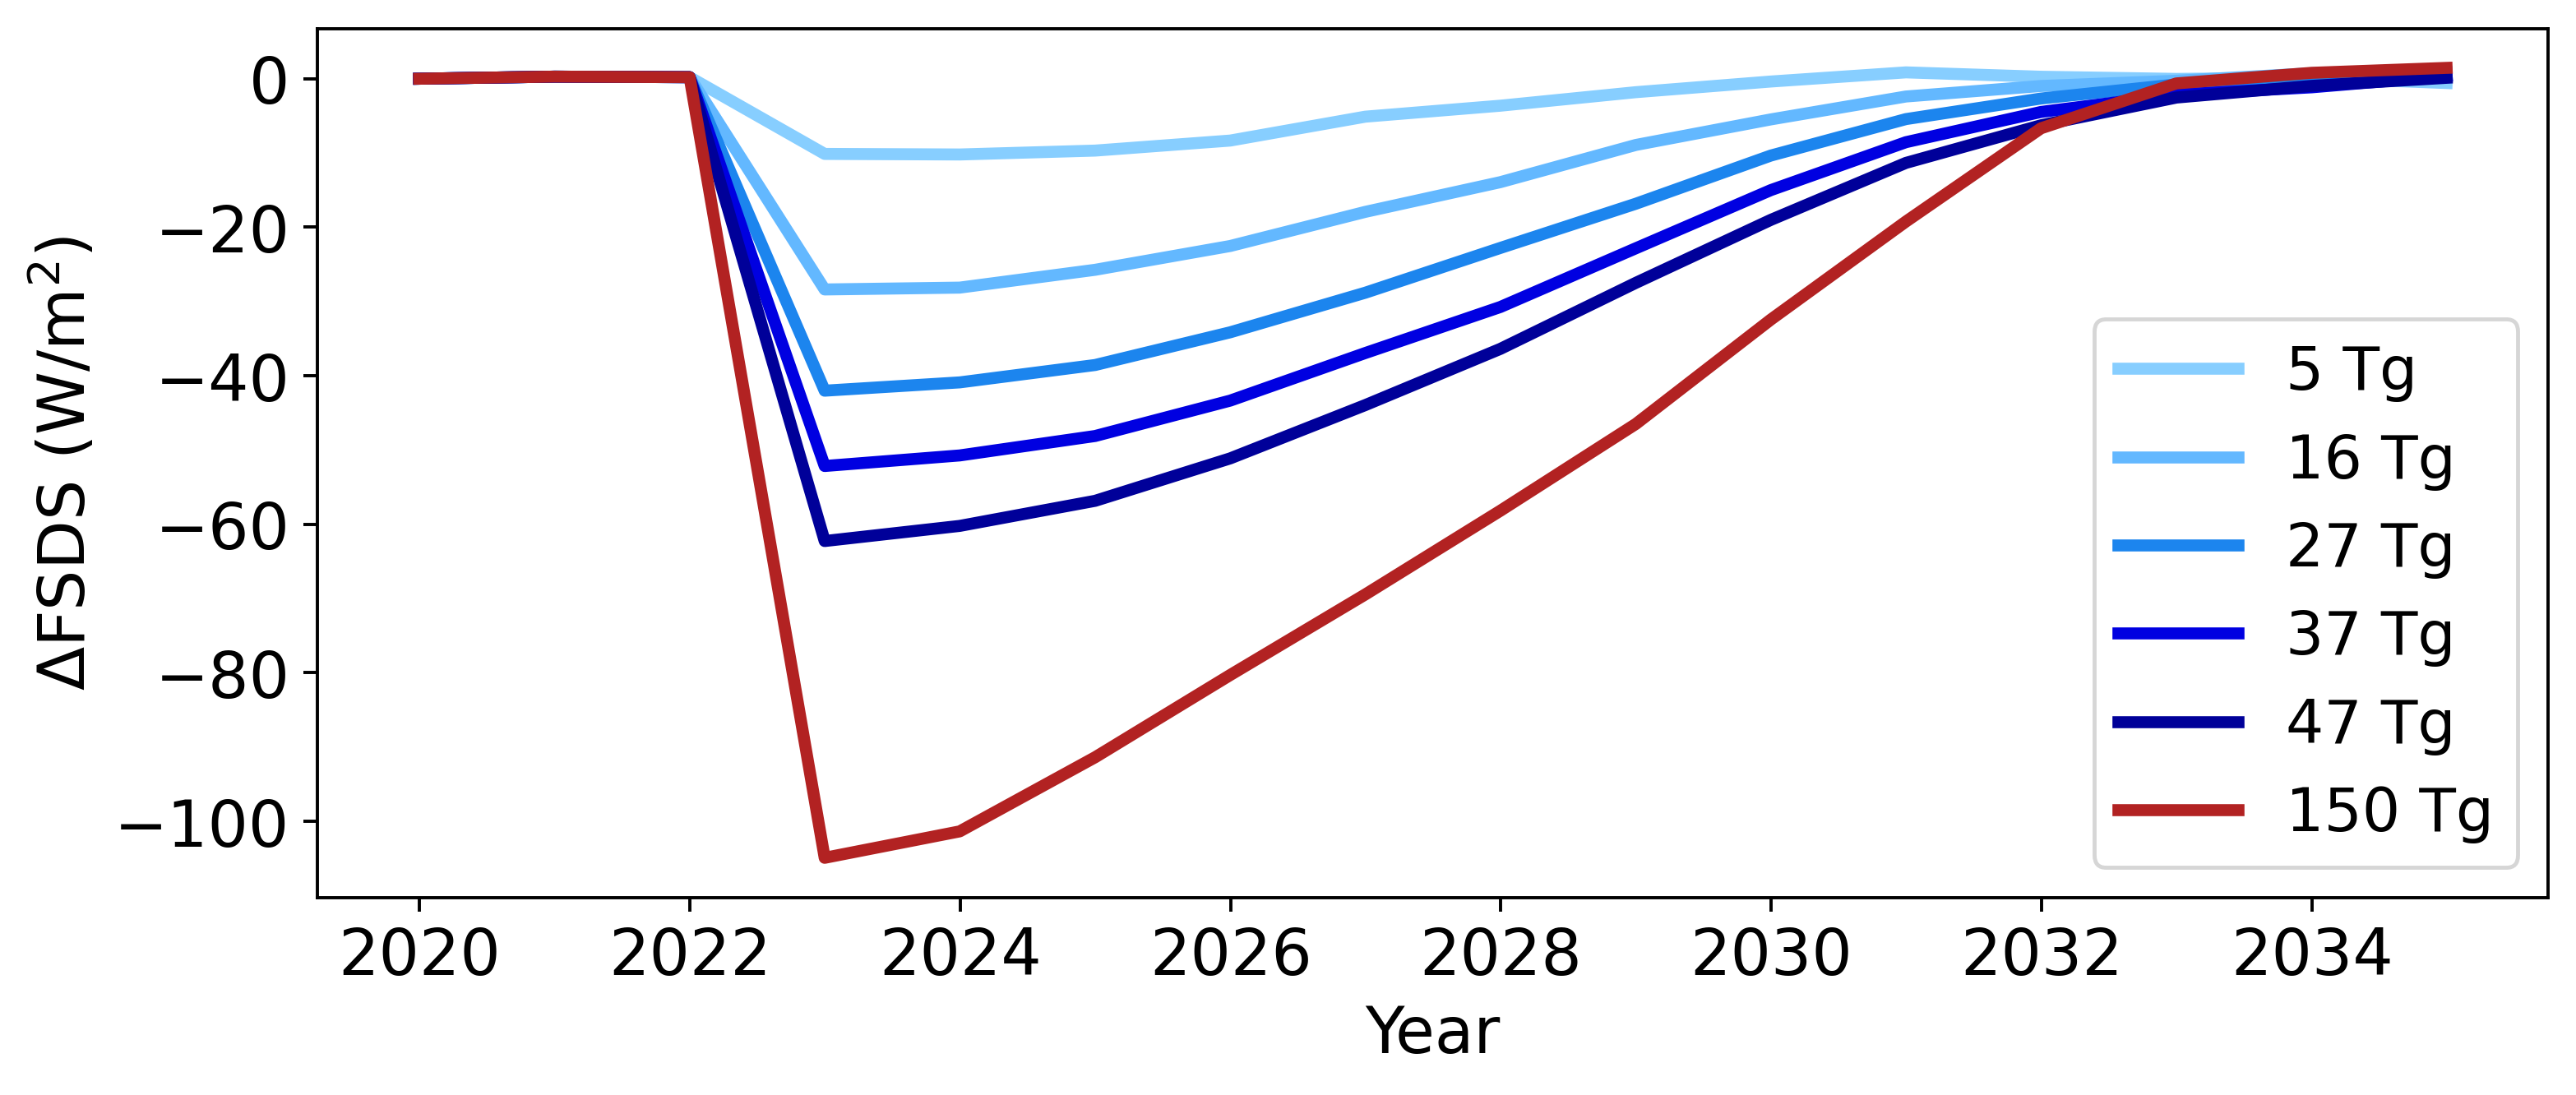

In [29]:
fig= plt.figure(figsize=(10,4), facecolor='w')

#plt.plot(dates_yr,1*full_control_pre,color = 'k', linewidth = 3, label = 'Control')
plt.plot(dates_yr_full[0:16],fsds_5_global_yr[0:16]-full_control_pre[0:16],color = '#87ceff', linewidth = 3, label = '5 Tg')
plt.plot(dates_yr_full[0:16],1*fsds_16_global_yr[0:16]-full_control_pre[0:16],color = '#63b8ff', linewidth = 3, label = '16 Tg')
plt.plot(dates_yr_full[0:16],1*fsds_27_global_yr[0:16]-full_control_pre[0:16],color = '#1c85ee', linewidth = 3, label = '27 Tg')
plt.plot(dates_yr_full[0:16],1*fsds_37_global_yr[0:16]-full_control_pre[0:16],color = '#0000e1', linewidth = 3, label = '37 Tg')
plt.plot(dates_yr_full[0:16],1*fsds_47_global_yr[0:16]-full_control_pre[0:16],color = '#000099', linewidth = 3, label = '47 Tg')
plt.plot(dates_yr_full[0:16],1*fsds_150_global_yr[0:16]-full_control_pre[0:16],color = '#b22222', linewidth = 3, label = '150 Tg')

plt.legend( loc='lower right',fontsize = '15')

plt.xlabel('Year')
plt.ylabel( '$\Delta$FSDS (W/m$^2$)')
#JUN-may MEAN  - 
plt.show() 
saveState = '/glade/u/home/vgarza/par/'
ptitle = 'Delta Radioactive Forcing, linewidth 3 no legend, no control'
#fig.savefig(saveState+ ptitle+ ' '  , bbox_inches='tight', quality = 95, dpi = 500)

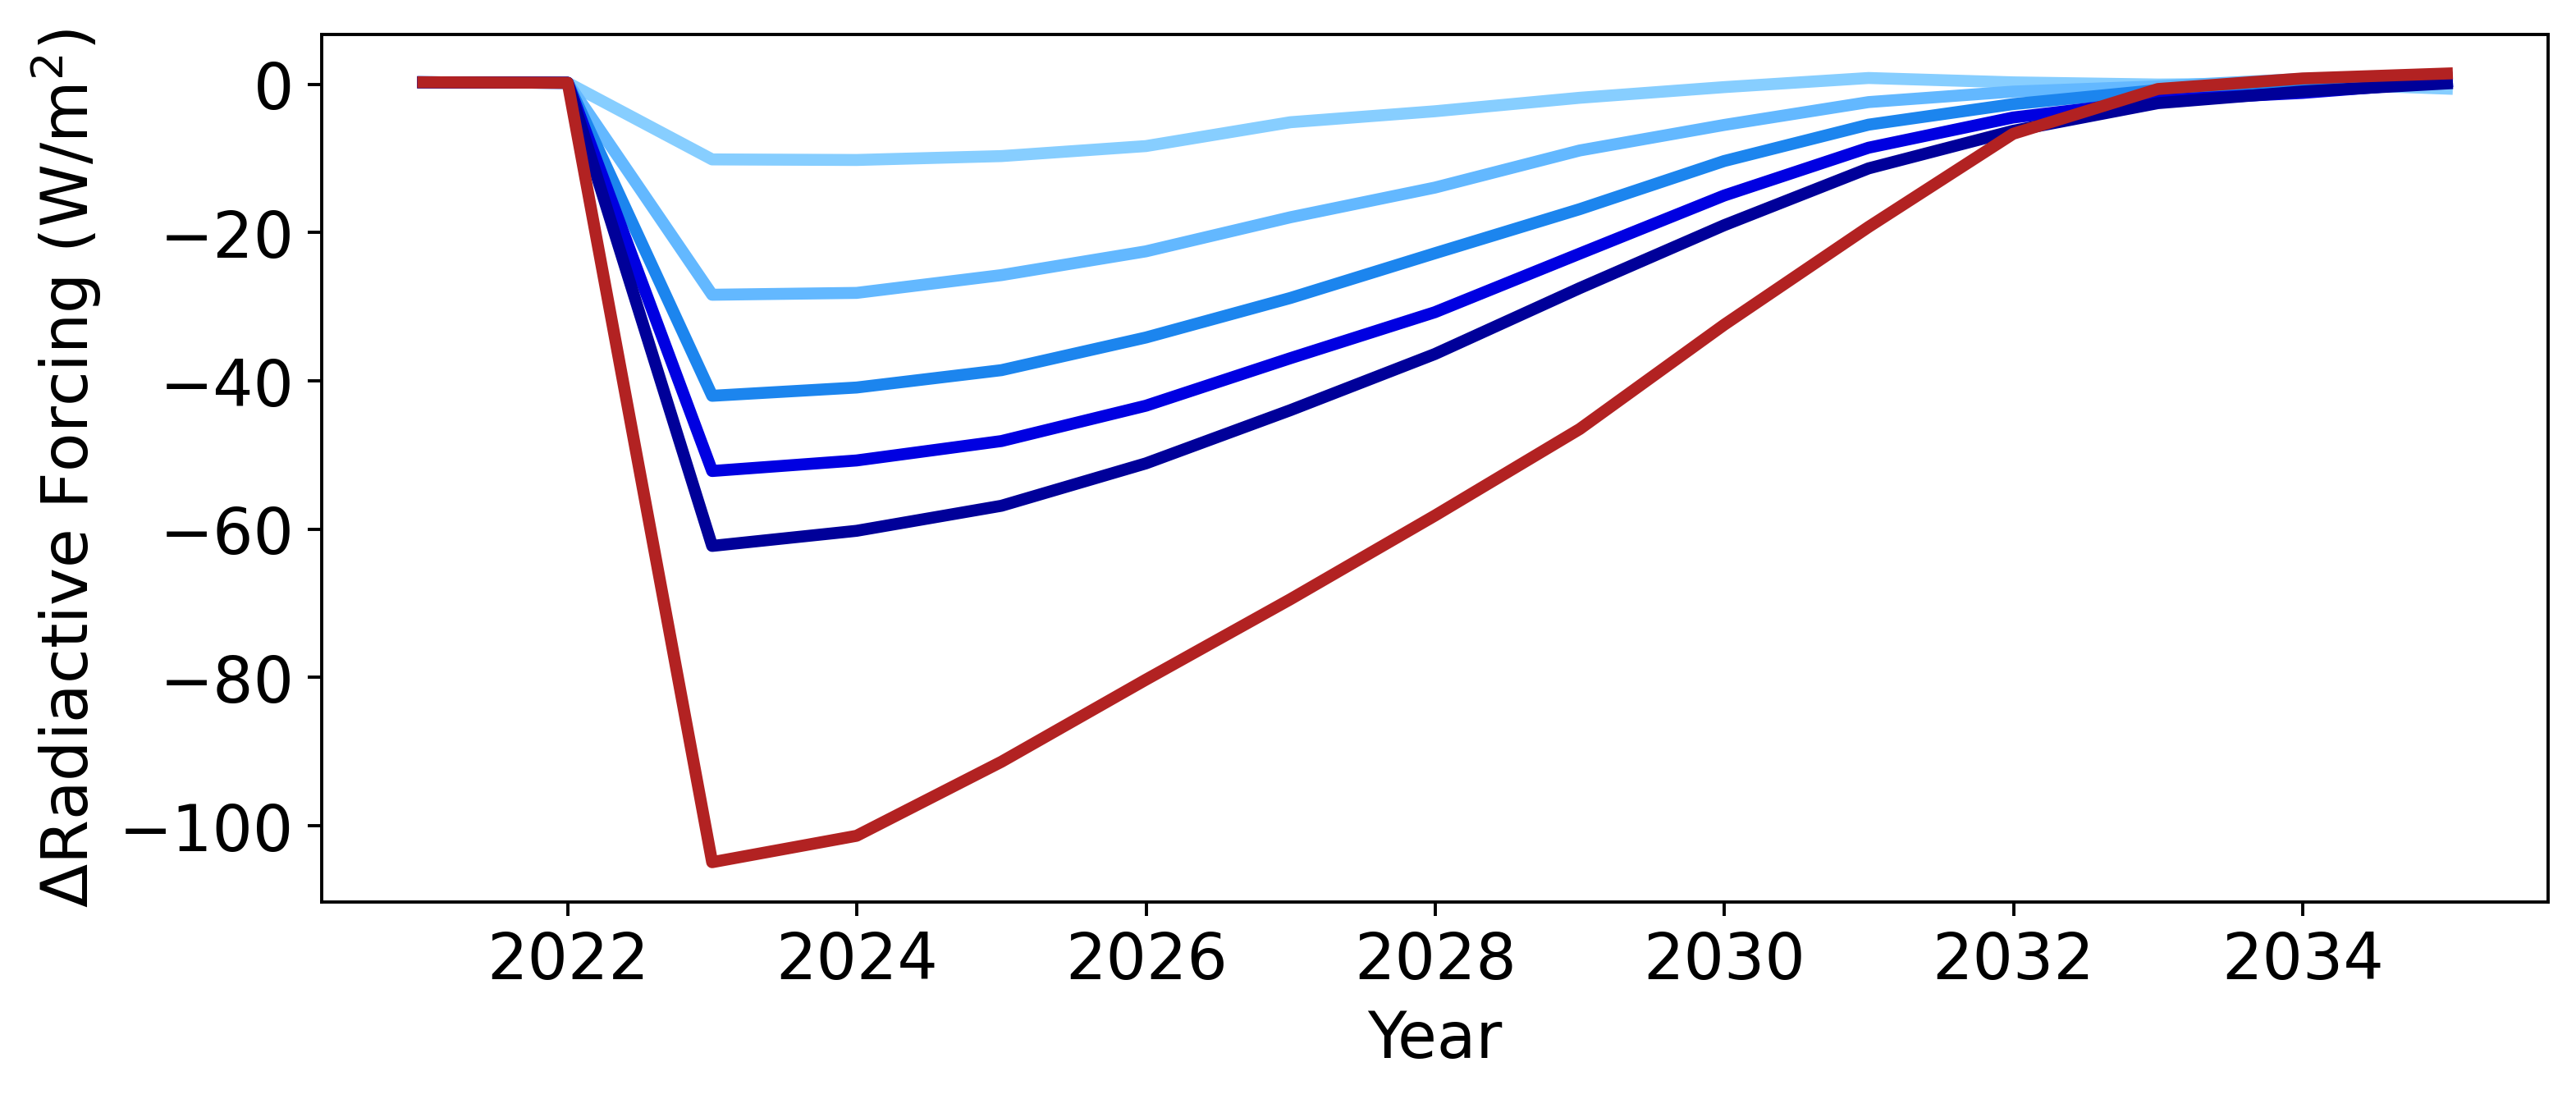

In [33]:
fig= plt.figure(figsize=(10,4), facecolor='w')

#plt.plot(dates_yr,1*full_control_pre,color = 'k', linewidth = 3, label = 'Control')
plt.plot(dates_yr_full[1:18],fsds_5_global_yr[1:18]-full_control_pre[1:18],color = '#87ceff', linewidth = 3, label = '5 Tg')
plt.plot(dates_yr_full[1:18],1*fsds_16_global_yr[1:18]-full_control_pre[1:18],color = '#63b8ff', linewidth = 3, label = '16 Tg')
plt.plot(dates_yr_full[1:18],1*fsds_27_global_yr[1:18]-full_control_pre[1:18],color = '#1c85ee', linewidth = 3, label = '27 Tg')
plt.plot(dates_yr_full[1:18],1*fsds_37_global_yr[1:18]-full_control_pre[1:18],color = '#0000e1', linewidth = 3, label = '37 Tg')
plt.plot(dates_yr_full[1:18],1*fsds_47_global_yr[1:18]-full_control_pre[1:18],color = '#000099', linewidth = 3, label = '47 Tg')
plt.plot(dates_yr_full[1:18],1*fsds_150_global_yr[1:18]-full_control_pre[1:18],color = '#b22222', linewidth = 3, label = '150 Tg')

#plt.legend( loc='lower right',fontsize = '15')

plt.xlabel('Year')
plt.ylabel( '$\Delta$Radiactive Forcing (W/m$^2$)')
#JUN-may MEAN  - 
plt.show() 
saveState = '/glade/u/home/vgarza/par/'
ptitle = 'Delta Radioactive Forcing, linewidth 3 no legend, no control'
#fig.savefig(saveState+ ptitle+ ' '  , bbox_inches='tight', quality = 95, dpi = 500)